### Penjelasan Deep Learning

Deep Learning adalah mengolah data non-eksak (gambar, suara, dll).

Dan pada praktik kali ini adalah membuat komputer belajar mengetahui gambar tersebut apakah batu, gunting, atau kertas.

Dalam prosesnya gambar diubah menjadi matriks dan vektor (teorinya dipelajari pada Aljabar Linear), kemudian ditraining. Setelah itu model bisa digunakan untuk pendeteksian. Ada kalanya komputer gagal membaca gambar, selayaknya manusia apabila terjadi seperti itu yang harus dilakukan adalah mengubah parameter-parameter dan mengulang training.

### Import library yang dibutuhkan

In [ ]:
import os
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Mengunduh berkas dataset dalam bentuk .zip

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hifzirahmatullah","key":"6bc41881f8913c723a0a3eba5887643a"}'}

In [ ]:
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download --force 'drgfreeman/rockpaperscissors'

 99% 304M/306M [00:02<00:00, 136MB/s]
100% 306M/306M [00:02<00:00, 134MB/s]


In [ ]:
# UNZIP FILE YANG TELAH DIDOWNLOAD
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# EXTRACT
zip_ref.extractall('file_extracted')
zip_ref.close()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
base_dir = 'file_extracted/rps-cv-images'

In [ ]:
# MELTHAT ISI DIRECTORY
os.listdir(base_dir)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [ ]:
# AUGMENTASI GAMBAR SECARA ARTIFISIAL MEMBUAT GAMBAR PELATIHAN MELALUI BERBAGAI CARA
# PEMROSESAN ATAU KOMBINASI DARI BEBERAPA PEMROSESAN, SEPERTI ROTASI ACAK,
# PERGESERAN, GESER, BALIK, DLL.

# TMAGEDATAGENERATOR MENGHASTLKAN KUMPULAN DATA GAMBAR DENGAN AUGMENTASI.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'wrap')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer=tf.optimizers.Adam(),
                metrics=[ 'accuracy' ])

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=16,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=4,
        verbose=2)

Epoch 1/15
16/16 - 16s - loss: 1.0047 - accuracy: 0.5000 - val_loss: 0.7603 - val_accuracy: 0.7578 - 16s/epoch - 1s/step
Epoch 2/15
16/16 - 13s - loss: 0.5594 - accuracy: 0.8050 - val_loss: 0.5907 - val_accuracy: 0.7969 - 13s/epoch - 783ms/step
Epoch 3/15
16/16 - 14s - loss: 0.4541 - accuracy: 0.8465 - val_loss: 0.3361 - val_accuracy: 0.8672 - 14s/epoch - 858ms/step
Epoch 4/15
16/16 - 14s - loss: 0.3692 - accuracy: 0.8574 - val_loss: 0.3247 - val_accuracy: 0.9141 - 14s/epoch - 891ms/step
Epoch 5/15
16/16 - 13s - loss: 0.3055 - accuracy: 0.8859 - val_loss: 0.2775 - val_accuracy: 0.9297 - 13s/epoch - 811ms/step
Epoch 6/15
16/16 - 13s - loss: 0.2627 - accuracy: 0.8945 - val_loss: 0.3047 - val_accuracy: 0.8750 - 13s/epoch - 825ms/step
Epoch 7/15
16/16 - 12s - loss: 0.3016 - accuracy: 0.8838 - val_loss: 0.2776 - val_accuracy: 0.8750 - 12s/epoch - 731ms/step
Epoch 8/15
16/16 - 14s - loss: 0.2201 - accuracy: 0.9238 - val_loss: 0.1526 - val_accuracy: 0.9375 - 14s/epoch - 888ms/step
Epoch 9/15


In [ ]:
# UPLOAD GAMBAR UNTUK DETEKSI GAMBAR
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving kertas1.jpeg to kertas1.jpeg
1/1 [==============================] - 0s 152ms/step
kertas1.jpeg
paper


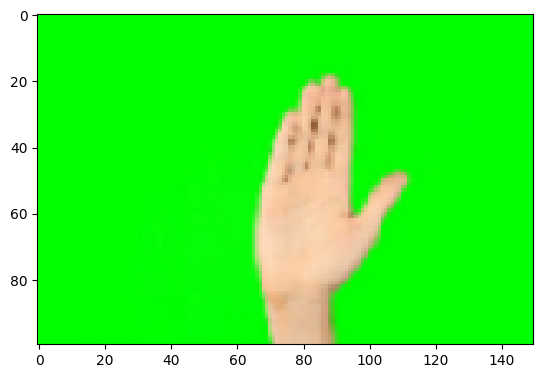

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims (x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0]==1:
        print('rock')
    elif classes[0][1]==1:
        print('paper')
    else:
        print('scissors')

Saving batu1.jpeg to batu1.jpeg
1/1 [==============================] - 0s 37ms/step
batu1.jpeg
paper


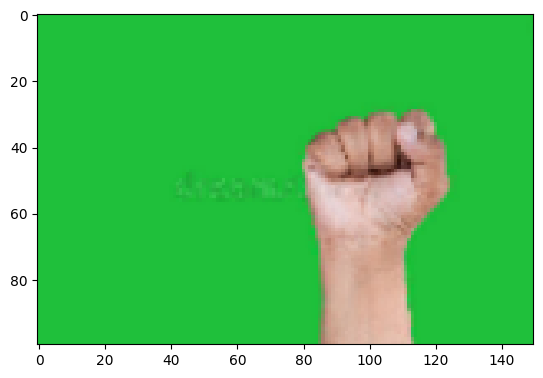

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims (x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0]==1:
        print('rock')
    elif classes[0][1]==1:
        print('paper')
    else:
        print('scissors')

Saving gunting1.jpeg to gunting1.jpeg
1/1 [==============================] - 0s 30ms/step
gunting1.jpeg
scissors


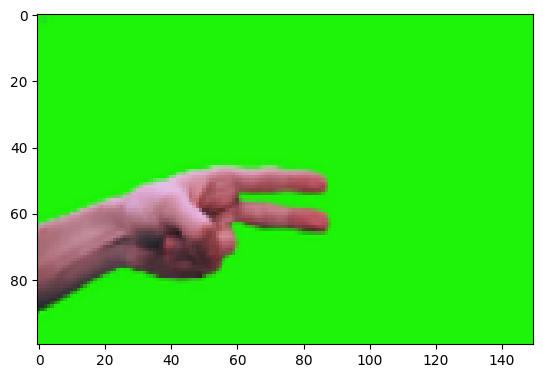

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims (x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0]==1:
        print('rock')
    elif classes[0][1]==1:
        print('paper')
    else:
        print('scissors')